In [1]:
import pandas as pd 
import numpy as np
import csv
import matplotlib.pyplot as plt

def read_csv_mixed_separators(file_path, possible_separators=[',', '       ', '\t']):
    def detect_separator(line):
        counts = {sep: line.count(sep) for sep in possible_separators}
        return max(counts, key=counts.get)

    data = []
    with open(file_path, 'r') as file:
        for line in file:
            separator = detect_separator(line)
            try:
                row = next(csv.reader([line], delimiter=separator))
                data.append(row)
            except csv.Error:
                print(f"Error parsing line: {line}")

    # Convert to DataFrame
    df = pd.DataFrame(data[1:], columns=data[0])
    return df
df = read_csv_mixed_separators('tour_occ_arnraw_tabular_country_of_origin_annual.tsv')


/var/folders/qg/sgj3q0zj6xvcgvl5h1k6w_nm0000gn/T/ipykernel_47357/1788462533.py:113: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part_2023['2023_normalized'] = df_part_2023['2023 '] / df_part_2023.groupby('c_resid')['2023 '].transform('sum')
/var/folders/qg/sgj3q0zj6xvcgvl5h1k6w_nm0000gn/T/ipykernel_47357/1788462533.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part_2023['travel_type'] = df_part_2023.apply(travel_type, axis=1)
/var/folders/qg/sgj3q0zj6xvcgvl5h1k6w_nm0000gn/T/ipykernel_47357/1

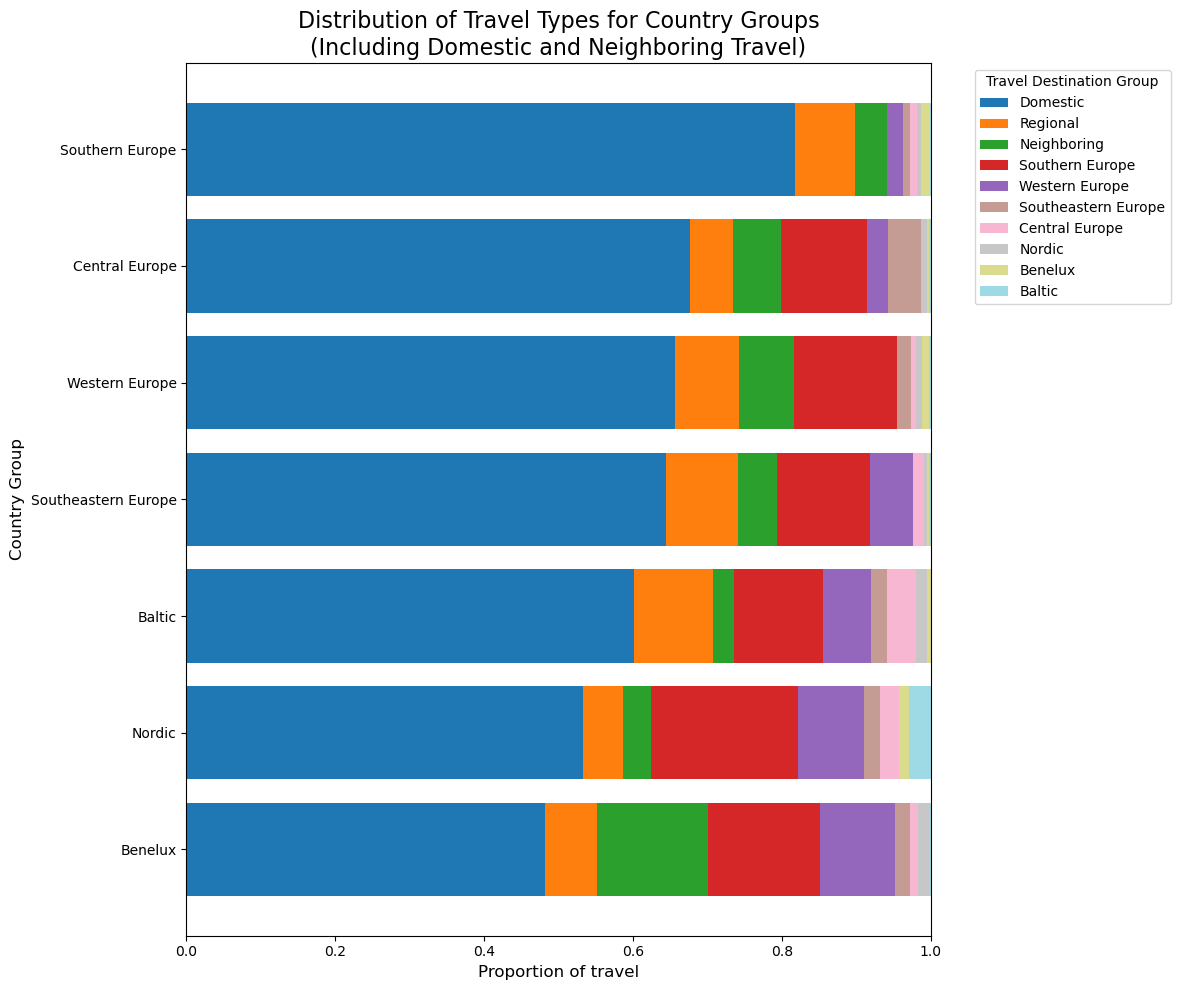

In [2]:

# Define the European country codes (unchanged)
european_country_codes = [
    "AT", "BE", "BG", "HR", "CY", "CZ", "DK", "EE", "FI", "FR", 
    "DE", "EL", "HU", "IE", "IT", "LV", "LT", "LU", "MT", "NL", 
    "PL", "PT", "RO", "SK", "SI", "ES", "SE", "CH", "NO", "IS", "UK"
]

# Define country groups (unchanged)
country_groups = {
    "Nordic": ["DK", "FI", "SE", "NO", "IS"],
    "Baltic": ["EE", "LV", "LT"],
    "Western Europe": ["FR", "IE", "UK", "DE", "AT", "CH"],
    "Central Europe": ["PL", "CZ", "SK", "HU"],
    "Benelux": ["BE", "NL", "LU"],
    "Southern Europe": ["IT", "ES", "PT", "EL", "MT", "CY"],
    "Southeastern Europe": ["BG", "RO", "HR", "SI"]
}

# Define neighboring countries
neighboring_countries = {
    "AT": ["DE", "CZ", "SK", "HU", "SI", "IT", "CH"],
    "BE": ["FR", "DE", "LU", "NL"],
    "BG": ["RO", "EL"],
    "HR": ["SI", "HU"],
    "CY": [],
    "CZ": ["DE", "PL", "SK", "AT"],
    "DK": ["DE"],
    "EE": ["LV"],
    "FI": ["SE", "NO"],
    "FR": ["BE", "LU", "DE", "CH", "IT", "ES"],
    "DE": ["DK", "PL", "CZ", "AT", "CH", "FR", "LU", "BE", "NL"],
    "EL": ["BG"],
    "HU": ["AT", "SK", "RO", "HR", "SI"],
    "IE": ["UK"],
    "IT": ["FR", "CH", "AT", "SI"],
    "LV": ["EE", "LT"],
    "LT": ["LV", "PL"],
    "LU": ["BE", "DE", "FR"],
    "MT": [],
    "NL": ["DE", "BE"],
    "PL": ["DE", "CZ", "SK", "LT"],
    "PT": ["ES"],
    "RO": ["HU", "BG"],
    "SK": ["PL", "HU", "AT", "CZ"],
    "SI": ["AT", "HU", "HR", "IT"],
    "ES": ["FR", "PT"],
    "SE": ["NO", "FI"],
    "CH": ["DE", "FR", "AT", "IT"],
    "NO": ["SE", "FI"],
    "IS": [],
    "UK": ["IE"]
}

# Create a dictionary to map each country to its group (unchanged)
country_to_group = {}
for group, countries in country_groups.items():
    for country in countries:
        country_to_group[country] = group

# Check if any countries are missing from the groupings (unchanged)
missing_countries = set(european_country_codes) - set(country_to_group.keys())
if missing_countries:
    print(f"Warning: The following countries are not grouped: {', '.join(missing_countries)}")

def convert_to_numeric(df, exclude_columns):
    df_copy = df.copy()
    columns_to_convert = [col for col in df_copy.columns if col not in exclude_columns]
    for col in columns_to_convert:
        df_copy[col] = pd.to_numeric(df_copy[col], errors='coerce')
    return df_copy

def plot_stacked_bar_group_aggregation(country_group_df_normalized):
    
    # Set up the plot
    fig, ax = plt.subplots(figsize=(12, 10))
    
    # Define a color palette for the travel types
    unique_travel_types = country_group_df_normalized.columns
    colors = plt.cm.get_cmap('tab20')(np.linspace(0, 1, len(unique_travel_types)))
    color_map = dict(zip(unique_travel_types, colors))
    
    # Plot horizontal stacked bars
    left = np.zeros(len(country_group_df_normalized))
    for travel_type in country_group_df_normalized.columns:
        values = country_group_df_normalized[travel_type]
        ax.barh(range(len(values)), values, left=left, label=travel_type, color=color_map[travel_type])
        left += values
    
    # Customize the plot
    ax.set_title('Distribution of Travel Types for Country Groups\n(Including Domestic and Neighboring Travel)', fontsize=16)
    ax.set_xlabel('Proportion of travel', fontsize=12)
    ax.set_ylabel('Country Group', fontsize=12)
    ax.set_yticks(range(len(country_group_df_normalized)))
    ax.set_yticklabels(country_group_df_normalized.index)
    ax.legend(title='Travel Destination Group', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
    
    # Adjust layout to prevent cutting off labels
    plt.tight_layout()
    plt.show()

# Main data processing and visualization
# Assuming 'df' is your original DataFrame
df_part = df[df.c_resid.isin(european_country_codes)]
df_part = df_part[df_part['geo\TIME_PERIOD'].isin(european_country_codes)]
df_part = df_part[(df_part['unit'] == 'NR') & (df_part['nace_r2'] == 'I551-I553')]
df_part = df_part.replace(': ', np.nan)

exclude_columns = ['c_resid', 'geo\TIME_PERIOD']
df_part = convert_to_numeric(df_part, exclude_columns)
df_part = df_part.drop(columns=['freq', 'unit', 'nace_r2'])

df_part_2023 = df_part[['c_resid', 'geo\TIME_PERIOD', '2023 ']]
df_part_2023['2023_normalized'] = df_part_2023['2023 '] / df_part_2023.groupby('c_resid')['2023 '].transform('sum')

# Create the stacked bar chart
# Function to determine travel type
def travel_type(row):
    if row['c_resid'] == row['geo\TIME_PERIOD']:
        return 'Domestic'
    elif country_to_group.get(row['c_resid']) == country_to_group.get(row['geo\TIME_PERIOD']):
        return 'Regional'
    elif row['geo\TIME_PERIOD'] in neighboring_countries.get(row['c_resid'], []):
        return 'Neighboring'
    else:
        return country_to_group.get(row['geo\TIME_PERIOD'], 'Other')

# Apply the travel type definition
df_part_2023['travel_type'] = df_part_2023.apply(travel_type, axis=1)

# Aggregate data by country groups and destination groups
grouped_df = df_part_2023.groupby(['c_resid', 'travel_type'])['2023 '].sum().unstack(fill_value=0)

# Further aggregate by country groups
country_group_df = grouped_df.groupby(grouped_df.index.map(country_to_group)).sum()

# Normalize the values for each country group
country_group_df_normalized = country_group_df.div(country_group_df.sum(axis=1), axis=0)

# Calculate domestic travel fraction for each country group
domestic_fractions = country_group_df_normalized['Domestic'] if 'Domestic' in country_group_df_normalized.columns else pd.Series(0, index=country_group_df_normalized.index)

# Sort country groups based on domestic travel fraction
sorted_groups = domestic_fractions.sort_values(ascending=True).index

# Reorder the dataframe
country_group_df_normalized = country_group_df_normalized.reindex(sorted_groups)

# Ensure 'Domestic', 'Regional', and 'Neighboring' are first, then sort the rest
cols = ['Domestic', 'Regional', 'Neighboring'] + [col for col in country_group_df_normalized.columns if col not in ['Domestic', 'Regional', 'Neighboring']]
country_group_df_normalized = country_group_df_normalized[cols]

# Sort the remaining columns based on their mean values (largest to smallest)
sorted_columns = country_group_df_normalized.iloc[:, 3:].mean().sort_values(ascending=False).index
country_group_df_normalized = country_group_df_normalized[['Domestic', 'Regional', 'Neighboring'] + list(sorted_columns)]

plot_stacked_bar_group_aggregation(country_group_df_normalized)

In [9]:
country_group_df_normalized.to_csv('travel_2023.csv')